# Validation Curve

# Load library

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

# Load dataset

In [36]:
dataobj = load_breast_cancer()

X = pd.DataFrame(dataobj.data, columns=dataobj.feature_names)
y = dataobj.target

df = X
df['target'] = y

df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Split data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.3, random_state=1, stratify=y)

# Pipe line 

In [38]:
scl = StandardScaler()
pca = PCA(n_components=.9)
clf = LogisticRegression()

pipe = Pipeline([
    ('scale', scl),
    ('PCA', pca),
    ('clf', clf)
])

pipe

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=0.9)),
                ('clf', LogisticRegression())])

# Validation curve

In [39]:
from sklearn.model_selection import validation_curve

In [40]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('PCA', PCA(n_components=0.9)),
  ('clf', LogisticRegression())],
 'verbose': False,
 'scale': StandardScaler(),
 'PCA': PCA(n_components=0.9),
 'clf': LogisticRegression(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': 0.9,
 'PCA__n_oversamples': 10,
 'PCA__power_iteration_normalizer': 'auto',
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__l1_ratio': None,
 'clf__max_iter': 100,
 'clf__multi_class': 'auto',
 'clf__n_jobs': None,
 'clf__penalty': 'l2',
 'clf__random_state': None,
 'clf__solver': 'lbfgs',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_start': False}

In [41]:
params_range = [.001, .01, .1, 1, 10, 100]

train_score, val_score = validation_curve(
    estimator=pipe,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=-1,
    param_name='clf__C',
    param_range=params_range
)

In [42]:
df_train_score = pd.DataFrame(train_score, index=params_range)
df_train_score

,0,1,2,3,4,5,6,7,8,9
0.001,0.816993,0.816993,0.823529,0.823529,0.836601,0.830065,0.816993,0.810458,0.816993,0.823529
0.010,0.941176,0.928105,0.928105,0.934641,0.941176,0.934641,0.941176,0.934641,0.928105,0.947712
0.100,0.980392,0.980392,0.980392,0.986928,0.980392,0.986928,0.980392,0.986928,0.980392,0.980392
1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993464
10.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
sum_train = df_train_score.aggregate(['mean'], axis = 1)
sum_train

,mean
0.001,0.821569
0.010,0.935948
0.100,0.982353
1.000,0.999346
10.000,1.000000
100.000,1.000000


In [44]:
df_val_score = pd.DataFrame(val_score, index=params_range)
df_val_score

,0,1,2,3,4,5,6,7,8,9
0.001,0.823529,0.882353,0.882353,0.882353,0.882353,0.764706,0.823529,0.941176,0.705882,0.647059
0.010,0.882353,1.000000,1.000000,0.941176,0.941176,0.941176,0.882353,0.941176,0.941176,0.823529
0.100,1.000000,1.000000,1.000000,0.941176,1.000000,0.941176,1.000000,0.941176,1.000000,0.941176
1.000,1.000000,1.000000,1.000000,0.941176,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10.000,1.000000,1.000000,1.000000,0.941176,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100.000,1.000000,1.000000,1.000000,0.941176,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
sum_val = df_val_score.aggregate(['mean'], axis=1)
sum_val

,mean
0.001,0.823529
0.010,0.929412
0.100,0.976471
1.000,0.994118
10.000,0.994118
100.000,0.994118


# Ploting validation curve

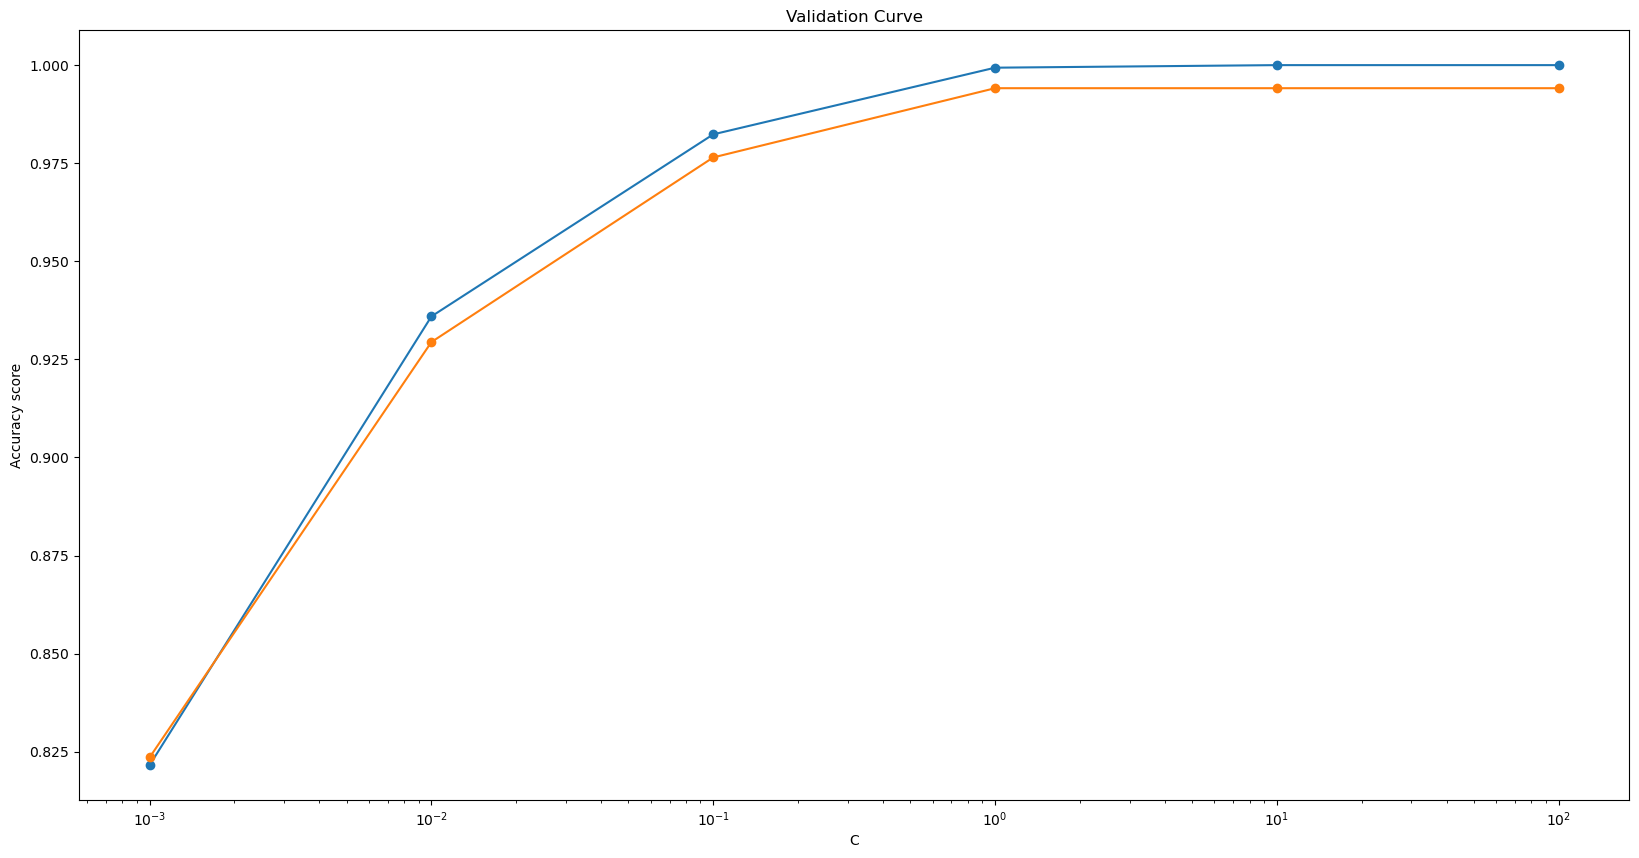

In [46]:
fig, ax = plt.subplots(figsize=(20 ,10))
ax.plot(sum_train, marker='o', label='Train dataset')
ax.plot(sum_val, marker='o', label='Validation dataset')
ax.set_xscale('log')
ax.set_xlabel('C')
ax.set_ylabel('Accuracy score')
ax.set_title('Validation Curve');